# Forecasting Subscription Revenue at End of 2025

In [ ]:
hub_rev <- data.frame(
  year = c(2022, 2023, 2024, 2025.5),
  revenue = c(1.69, 2.123, 2.569, 3)
)

print(hub_rev)

    year revenue
1 2022.0   1.690
2 2023.0   2.123
3 2024.0   2.569
4 2025.5   3.000


In [ ]:
model <- lm(revenue ~ year, data = hub_rev)


summary(model)


Call:
lm(formula = revenue ~ year, data = hub_rev)

Residuals:
       1        2        3        4 
-0.04432  0.01257  0.08246 -0.05071 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept) -758.76445   59.31962  -12.79  0.00606 **
year           0.37611    0.02931   12.83  0.00602 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.07581 on 2 degrees of freedom
Multiple R-squared:  0.988,	Adjusted R-squared:  0.982 
F-statistic: 164.6 on 1 and 2 DF,  p-value: 0.00602


In [ ]:
# Forecasting revenue for the end of 2025 (represented as year 2026)
forecast_year <- data.frame(year = 2026)
forecast_revenue <- predict(model, newdata = forecast_year)


cat("Forecasted revenue for the end of 2025: $", round(forecast_revenue, 3), " billion\n")

Forecasted revenue for the end of 2025: $ 3.239  billion


Forecasted revenue for the end of 2025: $ 3.239  billion


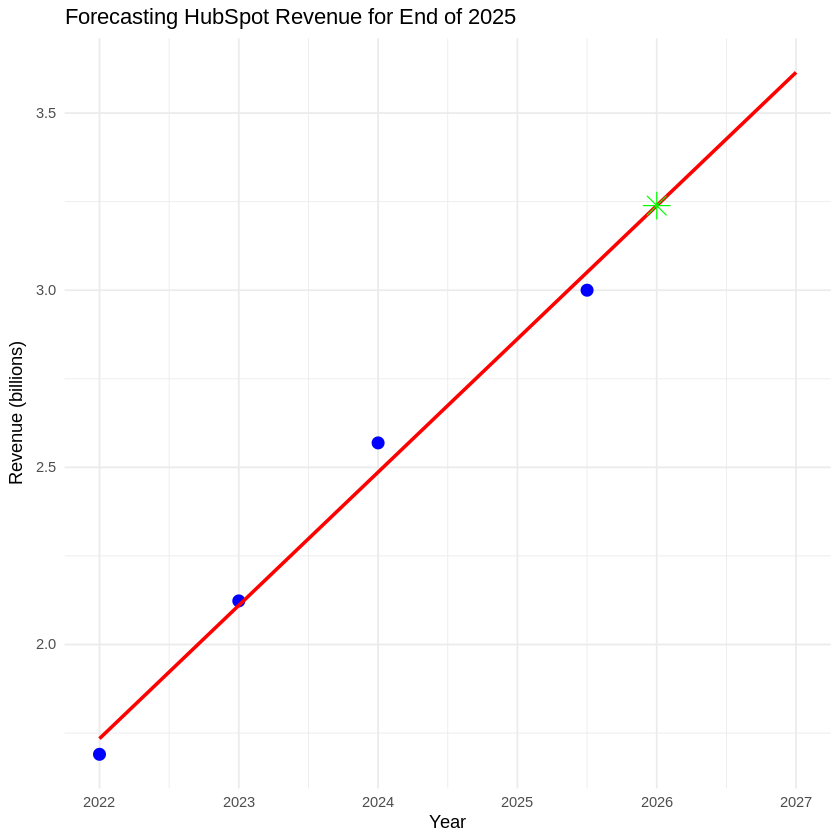

In [ ]:
library(ggplot2)

# data frame for regression line
regression_line_data <- data.frame(year = c(min(hub_rev$year), max(hub_rev$year) + 1.5))
regression_line_data$revenue <- predict(model, newdata = regression_line_data)

# dataframe for forecasted data point
forecast_point_data <- data.frame(year = forecast_year$year, revenue = forecast_revenue)

# Creating a plot to visualize prediction
ggplot() +
  geom_point(data = hub_rev, aes(x = year, y = revenue), color = "blue", size = 3) +
  geom_line(data = regression_line_data, aes(x = year, y = revenue), color = "red", linewidth = 1) +
  geom_point(data = forecast_point_data, aes(x = year, y = revenue), color = "green", size = 5, shape = 8) +
  labs(x = "Year", y = "Revenue (billions)", title = "Forecasting HubSpot Suscription Revenue for End of 2025") +
  theme_minimal() +
  scale_color_manual(values = c("blue", "green")) +
  guides(color = guide_legend(title = NULL))

cat("Forecasted subscription revenue for the end of 2025: $", round(forecast_revenue, 3), " billion\n")

# Forecasting Active Customers

In [ ]:
hub_cust <- data.frame(
  year = c(2018, 2019, 2020, 2021, 2022, 2023, 2024, 2024.5),
  customers = c(56.628, 73.483, 103.994, 135.442, 167.386,
  205.091, 247.939, 267.982)
)

print(hub_cust)

    year customers
1 2018.0    56.628
2 2019.0    73.483
3 2020.0   103.994
4 2021.0   135.442
5 2022.0   167.386
6 2023.0   205.091
7 2024.0   247.939
8 2024.5   267.982


NOTE: 2024.5 actually represents the midpoint of 2025.

This makes sense to do because each year represents the end of year. Thus, the prediction for 2025 will be the end of year 2025.

In [ ]:
model <- lm(customers ~ year, data = hub_cust)


summary(model)


Call:
lm(formula = customers ~ year, data = hub_cust)

Residuals:
   Min     1Q Median     3Q    Max 
-8.571 -5.880 -3.401  6.297 13.746 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -67093.594   2895.328  -23.17 4.23e-07 ***
year            33.269      1.432   23.23 4.18e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.912 on 6 degrees of freedom
Multiple R-squared:  0.989,	Adjusted R-squared:  0.9872 
F-statistic: 539.5 on 1 and 6 DF,  p-value: 4.175e-07


Forecasted active customers by year end of 2025:  275.763  thousand


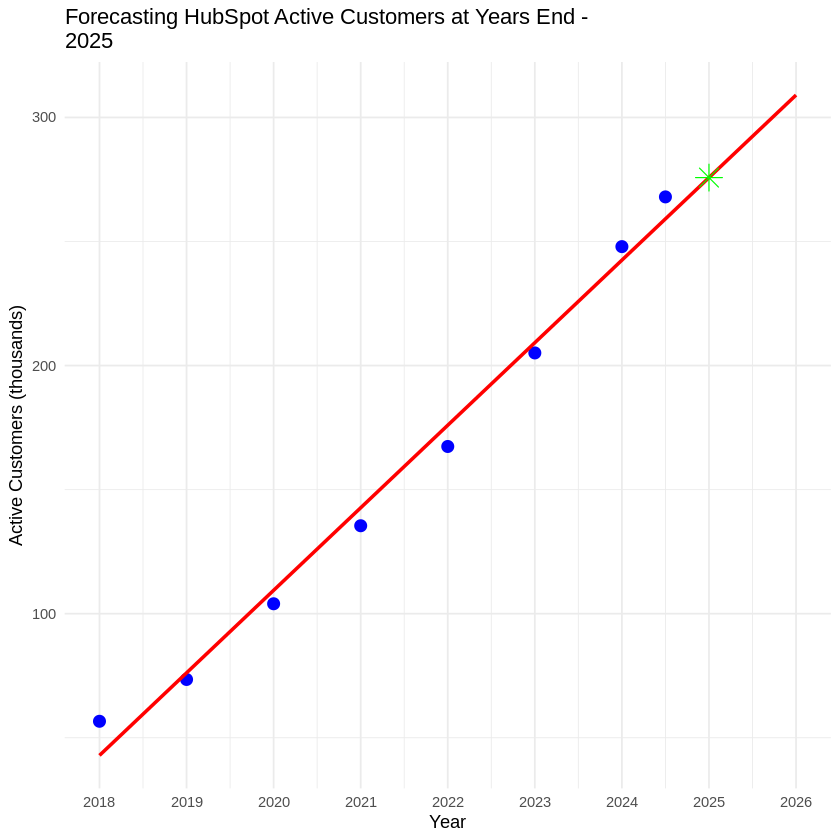

In [ ]:
cat("Forecasted active customers by year end of 2025: ", round(forecast_customers, 3), " thousand\n")

library(ggplot2)

# data frame for regression line
regression_line_data <- data.frame(year = c(min(hub_cust$year), max(hub_cust$year) + 1.5))
regression_line_data$customers <- predict(model, newdata = regression_line_data)

# dataframe for forecasted data point
forecast_year_cust <- data.frame(year = 2025)
forecast_customers <- predict(model, newdata = forecast_year_cust)

forecast_point_data_cust <- data.frame(year = forecast_year_cust$year, customers = forecast_customers)

# Creating a plot to visualize prediction
ggplot() +
  geom_point(data = hub_cust, aes(x = year, y = customers), color = "blue", size = 3) +
  geom_line(data = regression_line_data, aes(x = year, y = customers), color = "red", linewidth = 1) +
  geom_point(data = forecast_point_data_cust, aes(x = year, y = customers), color = "green", size = 5, shape = 8) +
  labs(x = "Year", y = "Active Customers (thousands)", title = "Forecasting HubSpot Active Customers at Years End - \n2025") +
  theme_minimal() +
  scale_color_manual(values = c("blue", "green")) +
  guides(color = guide_legend(title = NULL)) +
  scale_x_continuous(breaks = seq(min(hub_cust$year), max(forecast_year_cust$year)+1, by = 1))

# Estimating NRR for End of Year 2025

Using all values from the SaaStr report (more data==more robust model)

In [ ]:
nrr <- c(102.0, 115.0, 110.0, 103.9, 104.0, 102.0, 105.9)

years<- c(2020, 2021, 2022, 2023, 2024, 2024.25,  2024.5) # 2024.25 == quarter 2025 observation; 2024.5 == mid-2025 observation

In [ ]:
# converting to time series object

nrr_ts <- ts(nrr, start=2020, frequency=4) # Frequency set to 4 to indicate there are 4 periods within each year (helps model makes sense of the quarterly values)

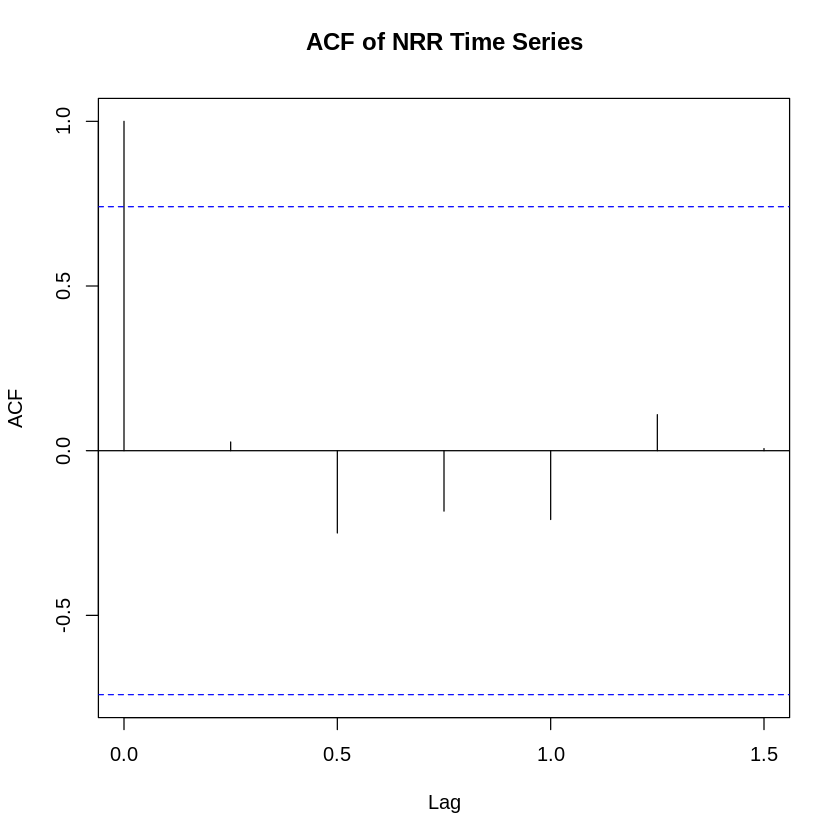

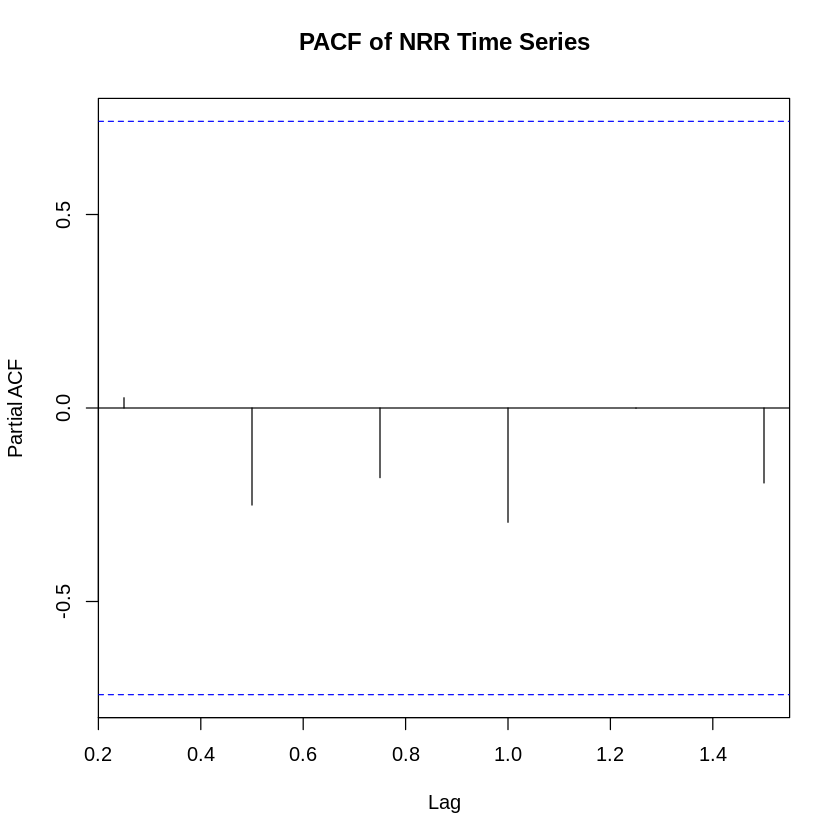

In [ ]:
# Plot ACF and PACF to help identify model orders
acf(nrr_ts, main = "ACF of NRR Time Series")
pacf(nrr_ts, main = "PACF of NRR Time Series")

# at time t (lag 0) nrr is perfectly correlated with itself.
# no other 'spikes' extending past the level of significance (5%) implies none of the periods are predictive of the others (based on limited data)

# thus no moving average or autoregressive model will be valid in this circumstance (not enough data)
# moving to a simpler model....

In [ ]:
# given the extremely limited data, we are fitting a simple random walk model [ARIMA[0,1,0]]

In [ ]:
# Fitting an ARIMA(0,1,0) model (Random Walk)
# This model assumes the next value is the current value plus some random noise

model_arima_010 <- arima(nrr_ts, order=c(0,1,0))


In [ ]:
install.packages('forecast')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘colorspace’, ‘fracdiff’, ‘lmtest’, ‘timeDate’, ‘tseries’, ‘urca’, ‘zoo’, ‘RcppArmadillo’




Forecasted NRR for the end of 2025 (using ARIMA(0,1,0)): 105.9 


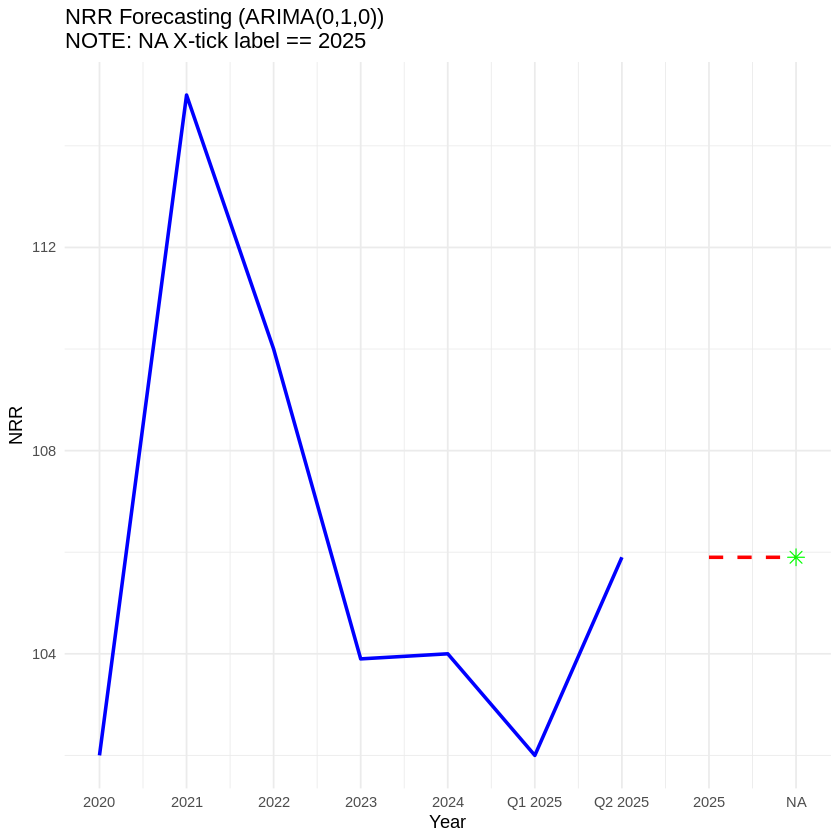

In [ ]:
library(forecast)
library(ggplot2)

# Forecast NRR for 2 periods ahead (to the end of 2025, given the data is quarterly ending at 2024.5)
nrr_forecast_arima010 <- forecast(model_arima_010, h = 2)

# Print the forecasted value for the end of 2025
cat("Forecasted NRR for the end of 2025 (using ARIMA(0,1,0)):", round(nrr_forecast_arima010$mean[2], 3), "\n")

# ensuring continuity between last historic data point at '2024.5' and the predicted value
if (forecast_df$year[1] > max(nrr_df$year)) {
  forecast_df <- rbind(
    data.frame(year = max(nrr_df$year), nrr = tail(nrr_df$nrr, 1)),
    forecast_df
  )
}

# Preparing plot
# combining the forecast and historical data so x axis displays accuractely
nrr_df<-data.frame(year = as.numeric(time(nrr_ts)), nrr = as.numeric(nrr_ts))
forecast_df<-data.frame(year=as.numeric(time(nrr_forecast_arima010$mean)),
nrr = as.numeric(nrr_forecast_arima010$mean))

# adding the forecasted nrr prediction to the year end 2025 data point
all_years<- sort(unique(c(nrr_df$year, forecast_df$year, 2025)))

# dynamically generating labels for x ticks
x_tick_labels <- c("2020", "2021", "2022", "2023", "2024", "Q1 2025", "Q2 2025", "2025")[1:length(all_years)]


ggplot() +
  geom_line(data = nrr_df, aes(x = year, y = nrr), color = 'blue', linewidth = 1) +
    geom_line(data = forecast_df, aes(x = year, y = nrr), color='red', linetype = 'dashed', linewidth=1) +
    geom_point(data = forecast_df[nrow(forecast_df), ],
  aes(x=year, y=nrr), color='green', size=3, shape=8) +
    labs(x='Year', y='NRR (%)', title="NRR Forecasting (ARIMA(0,1,0))\nNOTE: NA X-tick label == 2025") +
    theme_minimal() + scale_x_continuous(
    breaks=all_years,
    labels=x_tick_labels
    )
